In [1]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

### 仮定： オリンピックで国が獲得するメダル数を予想する

### データ

In [2]:
teams = pd.read_csv('teams.csv')
print(teams.shape)
teams = teams[['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals']]


In [3]:
teams.head(5)

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


In [4]:
teams['year'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1964
1       1968
2       1972
3       1980
4       2004
        ... 
2139    2000
2140    2004
2141    2008
2142    2012
2143    2016
Name: year, Length: 2144, dtype: int64>

In [104]:
teams.columns

Index(['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals'], dtype='object')

<AxesSubplot:xlabel='country'>

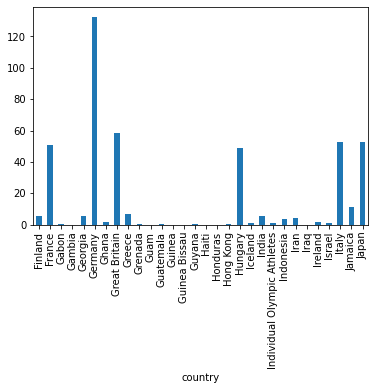

In [105]:
average_by_country = teams.groupby(teams['country'])['medals'].mean()
average_by_country[73:103].plot(kind='bar')


In [106]:
teams.corr()['medals']

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

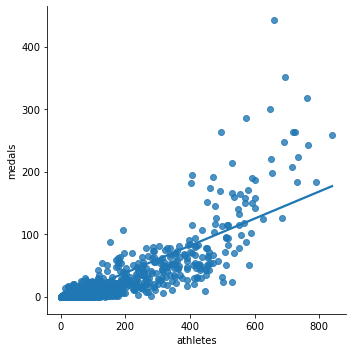

In [107]:
sns.lmplot(x='athletes', y='medals', data=teams, fit_reg=True, ci=None)

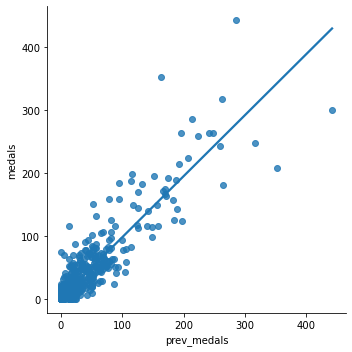

In [108]:
sns.lmplot(x='prev_medals', y='medals', data=teams, fit_reg=True, ci=None)

### データクリーニング

In [109]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [110]:
teams = teams.dropna()

In [111]:
teams.isnull().any()

team           False
country        False
year           False
athletes       False
age            False
prev_medals    False
medals         False
dtype: bool

In [112]:
train = teams[teams['year'] < 2012].copy() 
test = teams[teams['year'] >= 2012].copy() 
print('Number of rows in train: {}'.format(train.shape[0]))
print('Number of rows in test: {}'.format(test.shape[0]))

Number of rows in train: 1609
Number of rows in test: 405


### 予測モデル構築

In [113]:
reg = LinearRegression()
predictors = ['athletes', 'prev_medals']
target = 'medals'
reg.fit(train[predictors], train['medals'])

In [115]:
predictions = reg.predict(test[predictors])

In [116]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [117]:
test['predictions'] = predictions
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [118]:
test.loc[test['predictions'] < 0, 'predictions'] = 0
test['predictions'] = test['predictions'].round()
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


<AxesSubplot:xlabel='country'>

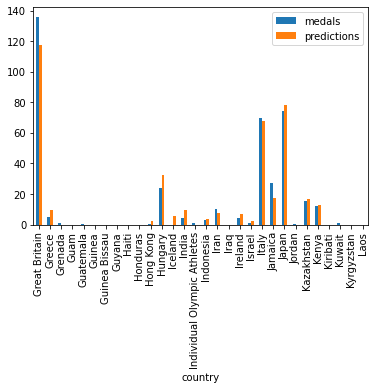

In [119]:
average_by_country = test.groupby(test['country'])[['medals', 'predictions']].mean()
average_by_country[73:103].plot(kind='bar')

In [120]:
test[test['country'] == 'Japan']

,team,country,year,athletes,age,prev_medals,medals,predictions
1048,JPN,Japan,2012,399,25.1,51.0,84,65.0
1049,JPN,Japan,2016,436,25.4,84.0,64,92.0


In [121]:
test[test['country'] == 'Germany']


,team,country,year,athletes,age,prev_medals,medals,predictions
755,GER,Germany,2012,510,26.6,99.0,94,109.0
756,GER,Germany,2016,536,26.5,94.0,159,107.0


In [122]:
test[test['country'] == 'India']


,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [123]:
errors = (test['medals'] - test['predictions']).abs()
error_by_country = errors.groupby(test['country']).mean()
error_by_country

country
Afghanistan       0.5
Albania           0.0
Algeria           1.5
American Samoa    0.0
Andorra           0.0
                 ... 
Venezuela         3.5
Vietnam           1.0
Yemen             0.0
Zambia            0.0
Zimbabwe          1.0
Length: 205, dtype: float64

In [124]:
error_by_country.mean()

3.290243902439024